<a href="https://colab.research.google.com/github/sameerans95211/.gitignore/blob/main/British.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("/content/customer_booking(1).csv")

# Show first rows

In [77]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [78]:
# Show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [79]:
# Describe numerical columns
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [80]:
# Check missing values
df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [81]:
# Show target variable distribution
print(df["booking_complete"].value_counts(normalize=True)*100)

booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64


In [82]:
#flight_day as categorical numeric
df["flight_day_num"] = df["flight_day"].astype("category").cat.codes

In [83]:
#trip_type
df["trip_type_num"] = df["trip_type"].astype("category").cat.codes

In [84]:
# sales_channel
df["sales_channel_num"] = df["sales_channel"].astype("category").cat.codes

In [85]:
 #booking_origin
df["booking_origin_num"] = df["booking_origin"].astype("category").cat.codes

In [86]:
#route
df["route_num"] = df["route"].astype("category").cat.codes

# Train Model

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [88]:
# Select features
features = ["num_passengers", "purchase_lead", "length_of_stay", "flight_hour", "flight_duration",
    "wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals", "flight_day_num",
    "trip_type_num", "sales_channel_num", "booking_origin_num", "route_num" ]


X = df[features]
y = df["booking_complete"]

In [89]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Train RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Predict
y_pred = clf.predict(X_test)

In [92]:
# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.56      0.11      0.18      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



In [93]:
print("ROC AUC Score:")
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

ROC AUC Score:
0.7719757565664255


# Cross Validation

In [94]:
cv_scores = cross_val_score(clf, X, y, cv=5, scoring="roc_auc")
print("Cross-validated AUC scores:", cv_scores)
print("Mean AUC:", cv_scores.mean())

Cross-validated AUC scores: [0.61083931 0.23478658 0.04059917 0.23325139 0.61497389]
Mean AUC: 0.3468900682760655


# Feature Importance vizualization

In [95]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

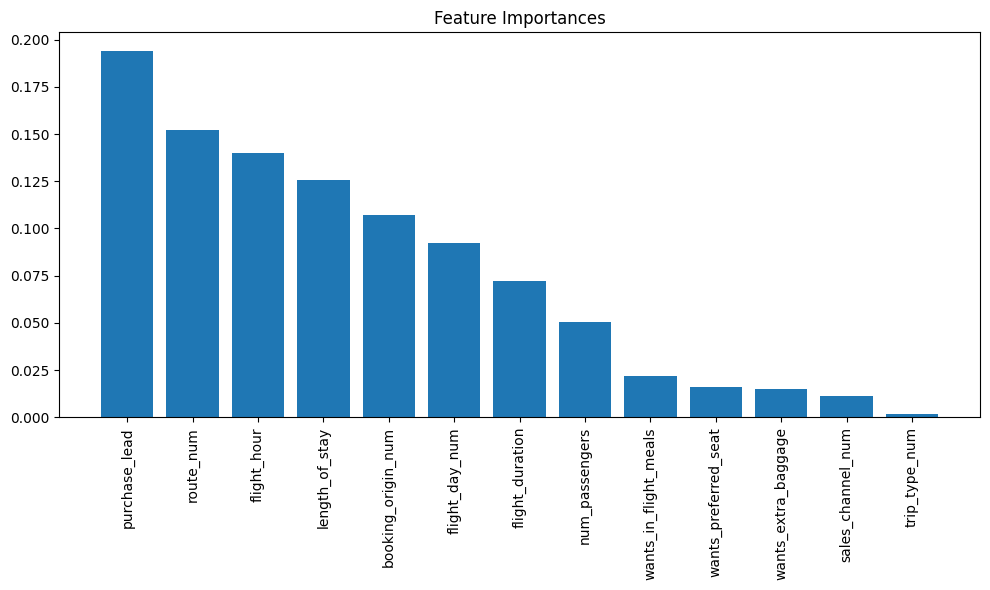

In [96]:
# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.tight_layout()
plt.show()